
## Assignment 3:
 Use a *spatial join* to relate data from a population data set to the buffer layer created in *assignment 2* to find out how many people live in all population grid cells that are **within** 1 km distance from each shopping centre in Stockholm 


Load the population layer for Stockholm named 'pop_stockholm.shp' in a geodataframe. Don’t forget to check if the layer is on an appropriate CRS (EPSG 3006, SWEREF99 TM)

   id                           name  \
0   1  Westfield Mall of Scandinavia   
1   2                 MOOD STOCKHOLM   
2   3                      Gallerian   
3   4                Hötorgspassagen   
4   5                 Sturegallerian   
5   6      Liljeholmstorget Galleria   
6   7                        Skrapan   

                                            geometry  
0  POLYGON ((673634.362 6585199.809, 673634.362 6...  
1  POLYGON ((677507.824 6581357.967, 677507.824 6...  
2  POLYGON ((677472.52 6581138.705, 677472.52 658...  
3  POLYGON ((677141.327 6581277.807, 677141.327 6...  
4  POLYGON ((677804.948 6581607.58, 677804.948 65...  
5  POLYGON ((675040.431 6578447.981, 675040.431 6...  
6  POLYGON ((677966.755 6578884.679, 677966.755 6...  
           fid  RutStorl           Ruta   POP  \
0        147.0      1000  6900006558000     3   
1        261.0      1000  6580006565000  3276   
2        281.0      1000  6820006564000   686   
3        291.0      1000  6510006570000    

<Axes: >

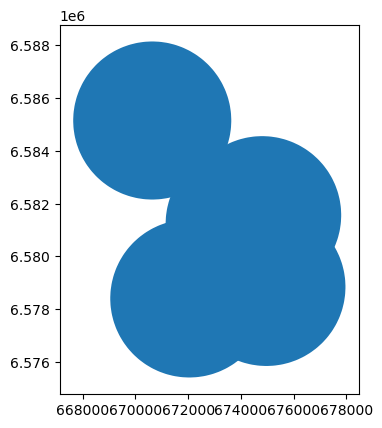

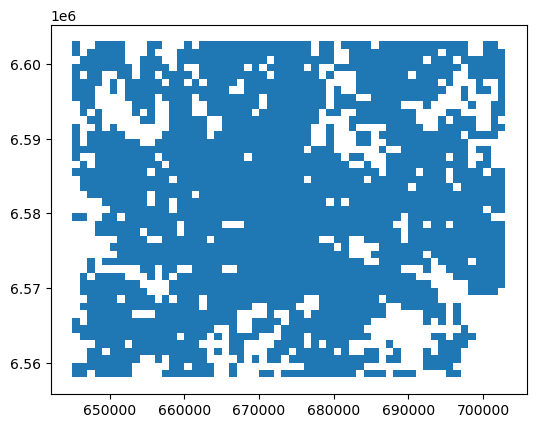

In [2]:
# Libraries 
import pandas as pd
import geopandas as gpd 
import pathlib
import shapely.geometry
import matplotlib.pyplot as plt
import pyproj

# Load buffer file
NOTEBOOK_PATH = pathlib.Path().resolve()
shopping_centre_buffers = gpd.read_file(
    NOTEBOOK_PATH / "buffers.gpkg"
)

# Replace 2000 m buffer with a 1000 m buffer  
shopping_centre_buffers["geometry"] = shopping_centre_buffers.buffer(1000)

# Load population file
pop_stockholm = gpd.read_file(
    NOTEBOOK_PATH / "data" / "pop_stockholm.shp"
)
shopping_centre_buffers.crs

# Show and plot data
print(shopping_centre_buffers)
print(pop_stockholm)
shopping_centre_buffers.plot()
pop_stockholm.plot()

Load the buffers computed in *assignment 2* into a `GeoDataFrame` called `shopping_centre_buffers`. Make sure both layers are in the same CRS

           fid  RutStorl           Ruta    POP  \
43      3045.0      1000  6760006578000  11131   
67      4163.0      1000  6750006583000   5508   
150     8938.0      1000  6720006584000     42   
169    10642.0      1000  6750006582000  14042   
169    10642.0      1000  6750006582000  14042   
...        ...       ...            ...    ...   
1934  113997.0      1000  6720006582000  17025   
1938  114420.0      1000  6730006581000  12672   
1938  114420.0      1000  6730006581000  12672   
1938  114420.0      1000  6730006581000  12672   
1938  114420.0      1000  6730006581000  12672   

                                               geometry  index_right  id  \
43    POLYGON ((676000 6578000, 676000 6579000, 6770...            6   7   
67    POLYGON ((675000 6583000, 675000 6584000, 6760...            4   5   
150   POLYGON ((672000 6584000, 672000 6585000, 6730...            0   1   
169   POLYGON ((675000 6582000, 675000 6583000, 6760...            1   2   
169   POLYGON ((675

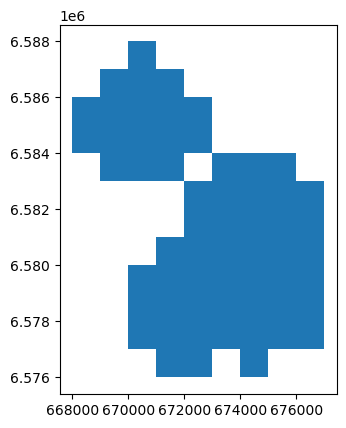

In [3]:
# Seelct those population polygons of "pop_stockholm" lying WITHIN the big polygons of "shopping_centre_buffers"
jointed_data = gpd.sjoin(pop_stockholm, shopping_centre_buffers, how = "inner", predicate = "within")

# Print the resulting joined data
jointed_data.plot()
print(jointed_data)
total_population = jointed_data["POP"].sum()
print(f"The total population living within {total_population}")


Join the shopping centre’s `id` column to the population data frame, for all population grid cells that are **within** the buffer area of each shopping centre. [Use a *join-type* that retains only rows from both input data frames for which the geometric predicate is true](https://geopandas.org/en/stable/gallery/spatial_joins.html#Types-of-spatial-joins). 

Compute the population sum for each shopping center's buffer. Print the results (ie., 'People living in Shopping center named 'XXX' is XX')

In [7]:
# Population group by mall names
population_sum_by_buffer = jointed_data.groupby("name")["POP"].sum()

# Print the results using for loop
for name, total_population in population_sum_by_buffer.items():
    print(f"People living in Shopping center buffer {name} is {total_population}")




People living in Shopping center buffer Gallerian is 191150
People living in Shopping center buffer Hötorgspassagen is 210238
People living in Shopping center buffer Liljeholmstorget Galleria is 121432
People living in Shopping center buffer MOOD STOCKHOLM is 191150
People living in Shopping center buffer Skrapan is 147711
People living in Shopping center buffer Sturegallerian is 184072
People living in Shopping center buffer Westfield Mall of Scandinavia is 95985
